In [1]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv("C:/Users/TANNERU/Downloads/Dataset for coding/SMSSpamCollection",sep = '\t',names = ['label','message'])

In [23]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [24]:
X = df['message']
Y = df['label']

In [25]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [26]:
Y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [27]:
from collections import Counter
print(Counter(Y))

Counter({'ham': 4825, 'spam': 747})


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [29]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [30]:
X[5569]

'Pity, * was in mood for that. So...any other suggestions?'

In [31]:
from collections import Counter
print(Counter(Y))

Counter({0: 4825, 1: 747})


# Data Cleaning

In [32]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [33]:
ps = PorterStemmer()
lemma = WordNetLemmatizer()
corpus = []

In [34]:
for i in range(0,len(X)):
    review = re.sub('[^a-zA-Z]',' ',X[i])
    review = review.lower()
    review = review.split()
    #stemming
    #review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    #lemmatising
    review = [lemma.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    

In [35]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [36]:
len(corpus)

5572

In [38]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers.embeddings import Embedding

# One_hot

In [40]:
vocab_size = 5000

In [41]:
onehot = [one_hot(word,vocab_size) for word in corpus]

In [42]:
onehot

[[2545,
  3216,
  3661,
  4784,
  2870,
  3473,
  4078,
  2331,
  2762,
  2979,
  2206,
  1552,
  4571,
  424,
  186,
  3088],
 [4272, 3904, 4555, 2197, 3244, 633],
 [1430,
  2818,
  120,
  2110,
  2771,
  682,
  4937,
  3162,
  2457,
  138,
  1561,
  3843,
  682,
  2945,
  2818,
  1098,
  2060,
  2776,
  4848,
  1735,
  4991],
 [3244, 2710, 1227, 29, 2967, 3244, 1735, 1321, 1227],
 [2050, 2099, 2545, 1401, 1360, 2220, 4325],
 [212,
  1557,
  333,
  3104,
  3838,
  1567,
  2228,
  4405,
  2141,
  3718,
  4272,
  19,
  2060,
  4497,
  1772,
  3542],
 [2282, 3811, 2228, 636, 1777, 2228, 2748, 721],
 [1907,
  3625,
  1343,
  1343,
  3347,
  1118,
  2327,
  2636,
  2699,
  1440,
  3231,
  2426,
  3224,
  3672,
  1440],
 [222,
  3655,
  1492,
  650,
  4144,
  3515,
  1035,
  2986,
  1184,
  3628,
  1184,
  2953,
  3503,
  4270,
  351],
 [2895,
  4336,
  3244,
  4964,
  514,
  88,
  618,
  2612,
  2895,
  1360,
  1430,
  3628,
  2895,
  88,
  3088,
  1430],
 [4076, 4387, 3492, 2993, 1510, 33

In [43]:
onehot[99]

[620, 4937, 2812, 3240]

In [44]:
len(onehot[99])

4

# Padding

In [46]:
max_length = 25

In [47]:
pad_docs = pad_sequences(onehot,padding ='pre',maxlen = max_length)

In [48]:
pad_docs

array([[   0,    0,    0, ...,  424,  186, 3088],
       [   0,    0,    0, ..., 2197, 3244,  633],
       [   0,    0,    0, ..., 4848, 1735, 4991],
       ...,
       [   0,    0,    0, ...,    8, 4752, 4113],
       [   0,    0,    0, ..., 1846, 3244, 1430],
       [   0,    0,    0, ..., 3135, 2376, 4973]])

In [49]:
len(pad_docs[0])

25

In [50]:
pad_docs.shape

(5572, 25)

# Creating model

In [52]:
dimensions = 40

In [57]:
model = Sequential()
#Embedding Layer
model.add(Embedding(vocab_size,dimensions,input_length = max_length))
model.add(Dropout(0.3))
#add 1st RNN layer
model.add(SimpleRNN(100,activation="tanh",return_sequences=True))
model.add(Dropout(0.3))
#add 2ND RNN layer
model.add(SimpleRNN(100,activation="tanh",return_sequences=True))
model.add(Dropout(0.3))
#add 3rd RNN layer
model.add(SimpleRNN(100,activation="tanh",return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 25, 40)            200000    
_________________________________________________________________
dropout_13 (Dropout)         (None, 25, 40)            0         
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 25, 100)           14100     
_________________________________________________________________
dropout_14 (Dropout)         (None, 25, 100)           0         
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 25, 100)           20100     
_________________________________________________________________
dropout_15 (Dropout)         (None, 25, 100)           0         
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 100)              

In [59]:
inputs = np.array(pad_docs)
Y = np.array(Y)#labels

In [60]:
inputs.shape

(5572, 25)

In [61]:
Y.shape

(5572,)

# splitting

In [62]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(inputs,Y,test_size = 0.25,random_state = 0) 

In [63]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(4179, 25)
(1393, 25)
(4179,)
(1393,)


In [64]:
cl = model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=10,batch_size = 64)

Train on 4179 samples, validate on 1393 samples
Epoch 1/10
4179/4179 [==============================] - 6s 2ms/step - loss: 0.2300 - acc: 0.9086 - val_loss: 0.0832 - val_acc: 0.9742
Epoch 2/10
4179/4179 [==============================] - 4s 1ms/step - loss: 0.0681 - acc: 0.9809 - val_loss: 0.0613 - val_acc: 0.9835
Epoch 3/10
4179/4179 [==============================] - 4s 1ms/step - loss: 0.0393 - acc: 0.9888 - val_loss: 0.0588 - val_acc: 0.9849
Epoch 4/10
4179/4179 [==============================] - 4s 1ms/step - loss: 0.0238 - acc: 0.9940 - val_loss: 0.0584 - val_acc: 0.9849
Epoch 5/10
4179/4179 [==============================] - 4s 1ms/step - loss: 0.0159 - acc: 0.9959 - val_loss: 0.0582 - val_acc: 0.9878
Epoch 6/10
4179/4179 [==============================] - 4s 952us/step - loss: 0.0106 - acc: 0.9978 - val_loss: 0.0647 - val_acc: 0.9856
Epoch 7/10
4179/4179 [==============================] - 4s 1ms/step - loss: 0.0127 - acc: 0.9962 - val_loss: 0.0530 - val_acc: 0.9871
Epoch 8/10
4

In [65]:
Ypred = model.predict_classes(Xtest)

In [66]:
Ypred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [67]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest,Ypred))

[[1207    1]
 [  20  165]]


In [68]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Ytest,Ypred))

0.9849246231155779


# Data Visualization

In [69]:
import matplotlib.pyplot as plt

In [70]:
cl.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

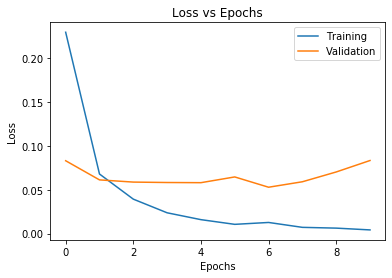

In [71]:
#Loss visualization
plt.plot(cl.history['loss'],label = 'Training')
plt.plot(cl.history['val_loss'],label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

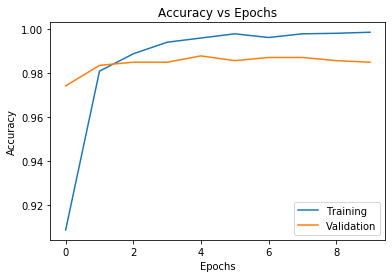

In [72]:
#Accuracy visualization
plt.plot(cl.history['acc'],label = 'Training')
plt.plot(cl.history['val_acc'],label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()